<a href="https://www.kaggle.com/code/leonardoterra/bots-identification-eda-classification?scriptVersionId=238812397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 **Dataset**
--
    Data Science EDA
    
### **Data Description**
This analysis is based on a dataset extracted from Kaggle.com. This dataset presents us data from Russia's biggest social media related to users possibly flagged as bots.

## **Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/users-vs-bots-classification/bots_vs_users.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

## **Data Exploration**
    During this step we can explore the shape of the data we are working with. It's usual to check and deal with the number of columns and rows, missing values, outliers and other inconsistencies that might appear.
--

In [3]:
# Plotting Dataframe

pd.set_option('display.max_columns', None)
df = pd.read_csv('/kaggle/input/users-vs-bots-classification/bots_vs_users.csv')
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,target,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,has_interests,has_books,has_tv,has_quotes,has_about,has_games,has_movies,has_activities,has_music,can_add_as_friend,can_invite_to_group,subscribers_count,is_blacklisted,has_career,has_military_service,has_hometown,marital_status,has_universities,has_schools,has_relatives,is_verified,is_confirmed,has_status,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,0.0,1.0,0,0.0,Unknown,1.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1.0,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Un

In [4]:
df.shape # Checking number of rows and columns

(5874, 60)

In [5]:
df.isna().mean() # Evaluating the % of missing values in every column

has_domain                    0.000000
has_birth_date                0.000000
has_photo                     0.000000
can_post_on_wall              0.000000
can_send_message              0.000000
has_website                   0.000000
gender                        0.000000
has_short_name                0.000000
has_first_name                0.000000
has_last_name                 0.000000
access_to_closed_profile      0.000000
is_profile_closed             0.000000
target                        0.000000
has_nickname                  0.000000
has_maiden_name               0.000000
has_mobile                    0.000000
all_posts_visible             0.000000
audio_available               0.000000
has_interests                 0.000000
has_books                     0.000000
has_tv                        0.000000
has_quotes                    0.000000
has_about                     0.000000
has_games                     0.000000
has_movies                    0.000000
has_activities           

In [6]:
# Deleting columns that have more than 50% of data as NULL

#df_v1 = df.loc[:, df.isna().mean() <= 0.5] # deleting columns which less that 50% of useful data.
#df_v1['city'] = df_v1['city'].replace('Unknown', 3) # Filling unknown values with 3 for CITY
#df_v2 = df_v1.replace('Unknown', np.nan)
#df_v2.shape

In [7]:
df_v1 = df.loc[:, df.isna().mean() <= 0.5] # deleting columns which less that 50% of useful data.

# Separating values to treat unknown values
subscribers_target = df_v1[['target','subscribers_count']]
other_features = df_v1 = df_v1.drop(['target','subscribers_count'], axis=1)

# Replacing unknown values with a number and with NaN 
other_features = other_features.replace('Unknown', 3)
df_v2 = pd.concat([subscribers_target, other_features], axis=1)
df_v2 = df_v2.replace('Unknown', np.nan) #Replacing unknown in SUBSCRIBERS_COUNT with NaN 

df_v2['city'] = df_v2['city'].apply(lambda x: 0 if x == 3 else 1) # Replacing 3 with 0 in City for better understanding.
df_v3 = df_v2.apply(lambda col: col.fillna(col.mode()[0])) # Filling Unknown values in SUBSCRIBERS_COUNT with the mode
df_final = df_v3.apply(lambda col: col.astype(float).astype(int)) # Turning all columns into int64 for training purposes
df_final.shape

(5874, 46)

In [8]:
df_final

,target,subscribers_count,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,has_interests,has_books,has_tv,has_quotes,has_about,has_games,has_movies,has_activities,has_music,can_add_as_friend,can_invite_to_group,is_blacklisted,has_career,has_military_service,has_hometown,marital_status,has_universities,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
2,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
3,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
4,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,0,0,1,1,1,0,0,3,2,1,1,1,0,1,0,3,1,0,0,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3
5870,0,0,1,3,1,0,0,3,1,1,1,1,0,1,1,1,1,0,0,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,0,1,1,1,0,3
5871,0,0,1,1,0,0,0,1,2,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,0,3
5872,0,778,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3


## **Statistical Analysis**
    This step seeks to understand the interaction and correlation among the features. Here it's possible to check multicolinearity, plot visulizations and highlight key points.
--

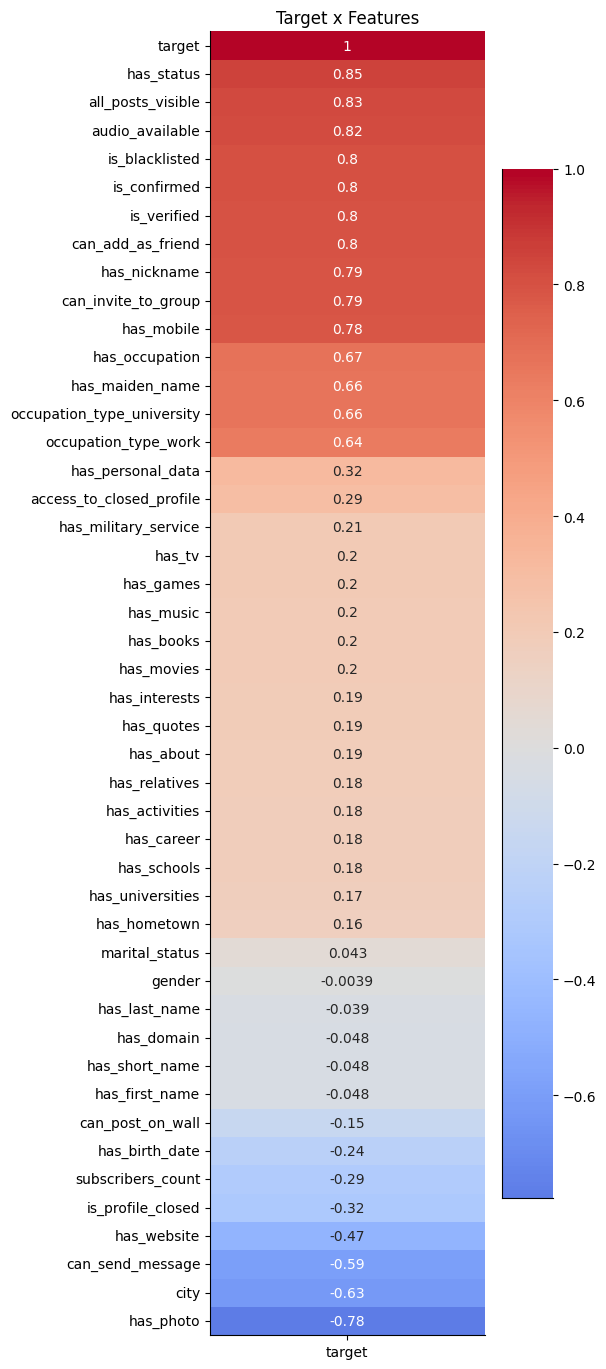

In [9]:
#Correlation - Target x Features

corr = df_final.corr()
target_corr = corr[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(6, len(target_corr) * 0.3))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Target x Features")
plt.tight_layout()

In [10]:
#Dropping features that don't present meaninful correlation with the target

data = df_final
data.shape

(5874, 46)

In [11]:
data

,target,subscribers_count,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,has_interests,has_books,has_tv,has_quotes,has_about,has_games,has_movies,has_activities,has_music,can_add_as_friend,can_invite_to_group,is_blacklisted,has_career,has_military_service,has_hometown,marital_status,has_universities,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
2,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
3,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
4,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,0,0,1,1,1,0,0,3,2,1,1,1,0,1,0,3,1,0,0,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3
5870,0,0,1,3,1,0,0,3,1,1,1,1,0,1,1,1,1,0,0,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,0,1,1,1,0,3
5871,0,0,1,1,0,0,0,1,2,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,0,3
5872,0,778,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3


In [12]:
#Detecting the % of outliers in the data
Q1 = data['subscribers_count'].quantile(0.25)
Q3 = data['subscribers_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data['subscribers_count'] < (Q1 - 1.5 * IQR)) | (data['subscribers_count'] > (Q3 + 1.5 * IQR))).sum()
print(f'{(outliers/data["subscribers_count"].count()*100):.2f}% of the data can be considered outliers. Therefore I decided to remove them.')

14.23% of the data can be considered outliers. Therefore I decided to remove them.


In [13]:
low_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

dataset = data[((data['subscribers_count'] >= low_limit) & (data['subscribers_count'] <= max_limit))]
dataset.shape

(5038, 46)

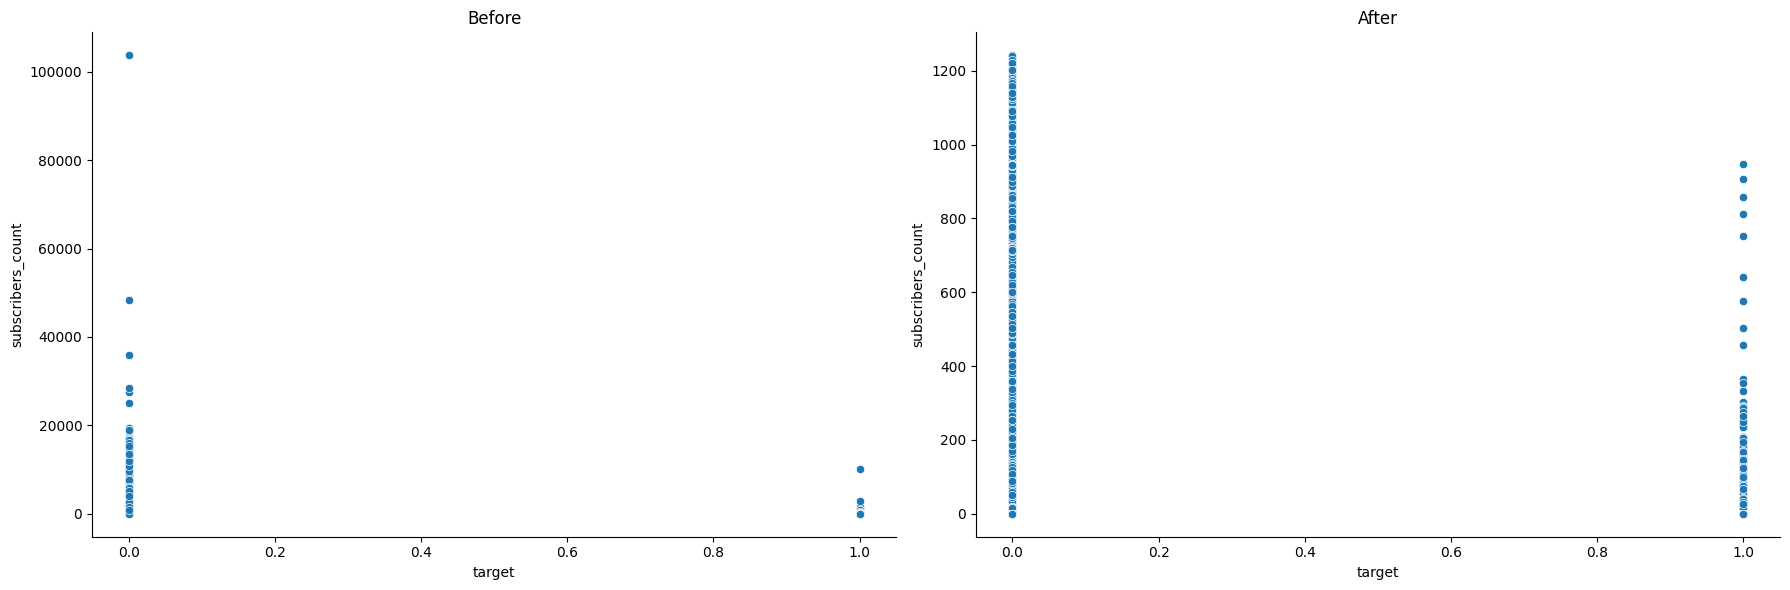

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0] = sns.scatterplot(data=data, x='target', y='subscribers_count', ax = ax[0])
ax[0].set_title("Before")
ax[1] = sns.scatterplot(data=dataset, x='target', y='subscribers_count', ax = ax[1])
ax[1].set_title("After")

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

## **Insights:**
--

### **Statistics**:
* It was decided to replace the unknown values with the number 3 instead of one hot enconding or other methods. This means that the values in each column go from 0 to 3 where (0 - FALSE, 1 - TRUE, 3 - UNKNOWN) Perhaps a PCA method is better.
* **Negative correlation** - The target has strong negative correlation with features related to profile details like if the user has photo or can send a message, which means that users that do not fill out their personal info can likely be flagged as bots.
* **Positve correlation** - The target has strong postive correlation with features related to confirmation status like if the user is verified, confirmed or blacklisted. This means that if the falls in one of those categories as TRUE or has an UNKNOWN value, it will likely be flagged as a bot.

# **Predctive Analysis**

## **Data Preparation**
    To prepare the data to build and test the models. 
--

In [15]:
data

,target,subscribers_count,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,has_interests,has_books,has_tv,has_quotes,has_about,has_games,has_movies,has_activities,has_music,can_add_as_friend,can_invite_to_group,is_blacklisted,has_career,has_military_service,has_hometown,marital_status,has_universities,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
2,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
3,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
4,1,0,1,1,0,0,0,0,1,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,0,0,1,1,1,0,0,3,2,1,1,1,0,1,0,3,1,0,0,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3
5870,0,0,1,3,1,0,0,3,1,1,1,1,0,1,1,1,1,0,0,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,0,1,1,1,0,3
5871,0,0,1,1,0,0,0,1,2,1,1,1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,0,3
5872,0,778,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,3,3,3,3,3,3,3,3,3,1,0,0,3,3,3,3,3,3,3,0,0,1,1,1,0,1,3


In [16]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # General metrics
from sklearn.preprocessing import MinMaxScaler # To scale features for better model performance
from sklearn.metrics import mean_squared_error # To assess how well the predctions match real data
from sklearn.metrics import confusion_matrix # To assess performance by comparing predictions against original data

## **Testing Models**
    To test and validade base models, run metrics and confidence interval to evaluate model performance
--

In [18]:
# Splitting data

X = data.drop(['target'], axis=1)
y = data['target']

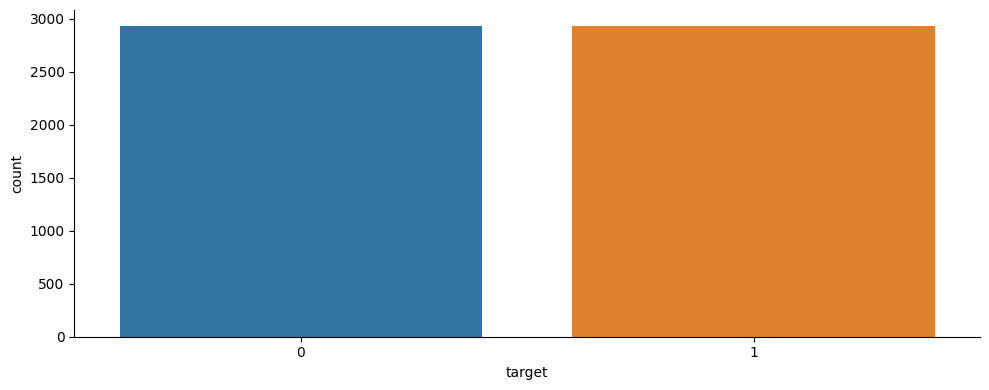

In [19]:
#Data is balanced, no need to apply any measures.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sns.countplot(x=y)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [20]:
# Scaling train and test data for better performance

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# First split: separate out the test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

##### **Creating base models**


In [22]:
# Function to run metrics

def model_metrics(x):
    accuracy = accuracy_score(y_test, y_predict) * 100
    class_atrix = classification_report(y_test,y_predict)
    
    print(class_atrix)
    print("Accuracy: %.2f%%" % accuracy)

In [23]:
# Function to run confidence interval of the models

def validation_results(results):
  mean = results['test_score'].mean()
  std = results['test_score'].std()
  print("Average Accuracy: %.2f%%" % (mean * 100))
  print("Accuracy interval: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

In [24]:
# Base Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# Dictionary of models
models = {
    "Dummy": DummyClassifier(strategy='stratified', random_state=42),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Dictionary to store results
results = {}

# Training and evaluating models
for name, model in models.items():
    if name == "Logistic Regression" or name == "K-Nearest Neighbors":
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Make predictions
        accuracy = accuracy_score(y_test, y_pred) # Evaluate accuracy
        results[name] = round(accuracy*100,2) # Store results
    else:
        model.fit(X_train, y_train) # Train the model
        y_pred = model.predict(X_test) # Make predictions
        accuracy = accuracy_score(y_test, y_pred) # Evaluate accuracy
        results[name] = round(accuracy*100,2) # Store results
            
print(results)

{'Dummy': 51.33, 'Logistic Regression': 96.14, 'K-Nearest Neighbors': 96.43}


##### **Evaluating Base models**
        All base models performed better than the dummy data created for validation. Below we can run Cross-Validation tests to evaluate further

In [25]:
# Decision Tree

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

# Validations
cv = KFold(n_splits = 5, shuffle = True)
results = cross_validate(tree_model, X_train, y_train, cv = cv, return_train_score=False)
mse = mean_squared_error(y_test, y_predict)

# Print Metrics, Confusion Matrix and MSE
model_metrics(tree_model)
print("---")
validation_results(results)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       862
           1       0.96      0.96      0.96       901

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

Accuracy: 95.92%
---
Average Accuracy: 95.35%
Accuracy interval: [94.99, 95.71]


In [26]:
# Decision Tree Confusion Matrix

confusion_matrix(y_test, y_predict)

array([[823,  39],
       [ 33, 868]])

In [27]:
# Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_predict = logistic_model.predict(X_test)

# Validations
cv = KFold(n_splits = 5, shuffle = True)
results = cross_validate(logistic_model, X_train, y_train, cv = cv, return_train_score=False)

# Print Metrics and validations
model_metrics(tree_model)
print("---")
validation_results(results)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       862
           1       0.96      0.97      0.96       901

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

Accuracy: 96.14%
---
Average Accuracy: 94.77%
Accuracy interval: [93.01, 96.53]


In [28]:
confusion_matrix(y_test, y_predict)

array([[822,  40],
       [ 28, 873]])

In [29]:
# KNN

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)

# Validations
cv = KFold(n_splits = 5, shuffle = True)
results = cross_validate(knn_model, X_train, y_train, cv = cv, return_train_score=False)

# Print Metrics and validations
model_metrics(knn_model)
print("---")
validation_results(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       862
           1       0.96      0.97      0.97       901

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

Accuracy: 96.43%
---
Average Accuracy: 94.99%
Accuracy interval: [93.45, 96.53]


In [30]:
confusion_matrix(y_test, y_predict)

array([[830,  32],
       [ 31, 870]])

All 3 Models performed very well, but KNN is more balanced. This is the model that will go to production.

In [31]:
from sklearn.pipeline import Pipeline

# Define a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), # Step 1: Standardize the data
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Step 2: Train model
])

# Train pipeline & cross_validade results.
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

cv = KFold(n_splits = 5, shuffle = True)
results = cross_validate(pipeline, X, y, cv = cv, return_train_score=False)


model_metrics(pipeline)
print("---")
validation_results(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       862
           1       0.96      0.97      0.97       901

    accuracy                           0.96      1763
   macro avg       0.96      0.96      0.96      1763
weighted avg       0.96      0.96      0.96      1763

Accuracy: 96.43%
---
Average Accuracy: 95.37%
Accuracy interval: [93.16, 97.58]


In [32]:
# Saving model for deployment

import joblib

pipeline.fit(X, y)

# Save the pipeline to a file
joblib.dump(pipeline, "knn.pkl")

#model = joblib.load("knn_pipeline.pkl")

['knn.pkl']

## **Insights**
--

### **Base Models**:
* All base models present good results when compared to the Dummy classifier. KNN was chosen as it is possibly the most balanced model when it comes to avoiding False positives and negatives
* For training the models, a number 3 was choosen as a placeholder for missing values. This approach is valid however it's not the only one. Other approaches can be considered and even better if used correctly. This is the simplest one.

# **Thank You for taking the time to view this Notebook**!
​
If you found this analysis useful and have any feedback or suggestions, don't hesitate to contact me! We are here to learn!